In [1]:
import networkx as nx
import pandas as pd
import glob 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df_char = pd.read_csv("data/patient_characteristics.csv")
df_char = pd.read_csv("data/char_cleaned.csv")
GCPS_L1 = list(df_char[df_char['GCPS_GRADE'] == 1]['token'])
GCPS_L2 = list(df_char[df_char['GCPS_GRADE'] == 2]['token'])
GCPS_L3 = list(df_char[df_char['GCPS_GRADE'] == 3]['token'])
GCPS_L4 = list(df_char[df_char['GCPS_GRADE'] == 4]['token'])

### Average GDV of four GCPS grades:

In [3]:
def group_average_GDV(patient_id_list):
    num = 0
    vec = np.zeros(7)
    for file in glob.glob('Ego_networks/*'):
        node_id = file[13:21]
        if (node_id in patient_id_list):
            num += 1
            G = nx.read_edgelist(file, delimiter=',', create_using=nx.Graph, data = (('edge_type', str),))
            dic = nx.induced_graphlet_degree_vector_ego(G, node_id) 
            #print(node_id)
            #print(dic[node_id])
            vec = np.add(vec, dic[node_id]) 
    return vec / num

In [4]:
gdv_lvl_1 = group_average_GDV(GCPS_L1)
gdv_lvl_2 = group_average_GDV(GCPS_L2)
gdv_lvl_3 = group_average_GDV(GCPS_L3)
gdv_lvl_4 = group_average_GDV(GCPS_L4)
print(gdv_lvl_1)
print(gdv_lvl_2)
print(gdv_lvl_3)
print(gdv_lvl_4)

[ 8.33333333 19.52380952 14.52380952 21.0952381  35.38095238 13.23809524
 16.33333333]
[ 8.75757576 22.         14.18181818 26.48484848 38.06060606 12.
 15.03030303]
[ 8.41791045 22.67164179 11.70149254 31.20895522 33.52238806  9.6119403
 12.25373134]
[ 8.29120879 21.35164835 11.81318681 29.7967033  29.57142857 10.34615385
 12.61538462]


In [5]:
all_lvl = np.array((gdv_lvl_1, gdv_lvl_2, gdv_lvl_3, gdv_lvl_4))
label = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4']

In [6]:
df_all_lvl = pd.DataFrame(all_lvl, columns=['2-clique', '2-path', '3-clique', '3-star', 'tailed-tri', '4-chordal-cycle', '4-clique'])
df_all_lvl['Grade'] = label

In [7]:
df_all_lvl

,2-clique,2-path,3-clique,3-star,tailed-tri,4-chordal-cycle,4-clique,Grade
0,8.333333,19.523810,14.523810,21.095238,35.380952,13.238095,16.333333,Grade 1
1,8.757576,22.000000,14.181818,26.484848,38.060606,12.000000,15.030303,Grade 2
2,8.417910,22.671642,11.701493,31.208955,33.522388,9.611940,12.253731,Grade 3
3,8.291209,21.351648,11.813187,29.796703,29.571429,10.346154,12.615385,Grade 4


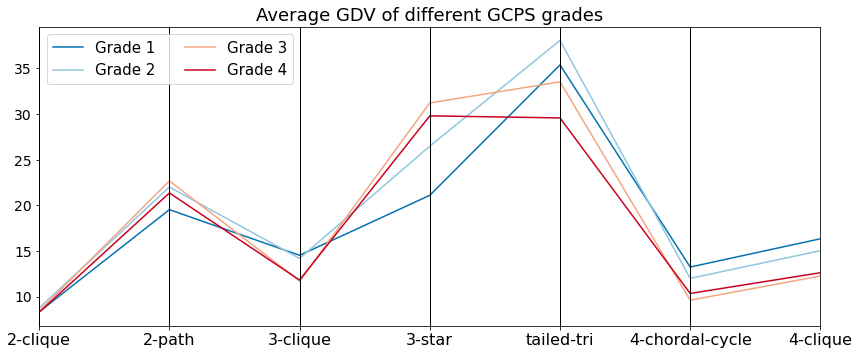

In [8]:
plt.figure(figsize=(14,5.5))
pd.plotting.parallel_coordinates(
    df_all_lvl, 'Grade', color=('#0571b0','#92c5de','#f4a582', '#ca0020'), axvlines=True)
plt.grid(False)
plt.legend(fontsize=15, ncol=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

plt.title("Average GDV of different GCPS grades", fontsize=18)
plt.savefig("PCP_GDV.pdf")

## Average TyE-GDV of four GCPS grades:

In [9]:
def group_average_TyEGDV(patient_id_list):
    num = 0
    vec = np.zeros((7, 13))
    for file in glob.glob('Ego_networks/*'):
        node_id = file[13:21]
        if (node_id in patient_id_list):
            num += 1
            G = nx.read_edgelist(file, delimiter=',', create_using=nx.Graph, data = (('edge_type', str),))
            dic = nx.typed_edge_induced_graphlet_degree_vector_ego(G, num_type=13, nodes=node_id) 
            vec = np.add(vec, dic[node_id]) 
    return vec / num

In [10]:
tye_gdv_lvl_1 = group_average_TyEGDV(GCPS_L1)
tye_gdv_lvl_2 = group_average_TyEGDV(GCPS_L2)
tye_gdv_lvl_3 = group_average_TyEGDV(GCPS_L3)
tye_gdv_lvl_4 = group_average_TyEGDV(GCPS_L4)

In [11]:
def visualise_tyE_GDV(gidx):
    all_lvl = np.array((tye_gdv_lvl_1[gidx], tye_gdv_lvl_2[gidx], tye_gdv_lvl_3[gidx], tye_gdv_lvl_4[gidx]))
    label = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4']
    df_all_lvl = pd.DataFrame(all_lvl, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])
    df_all_lvl['Grade'] = label
    name_list = ['2-clique', '2-path', '3-clique', '3-star', 'tailed-triangle', '4-chordal-cycle', '4-clique']
    print(all_lvl)

    plt.figure(figsize=(14,7.2))
    pd.plotting.parallel_coordinates(
        df_all_lvl, 'Grade', color=('#0571b0','#92c5de','#f4a582', '#ca0020'), axvlines=True)
    plt.grid(False)
    plt.legend(fontsize=14, ncol=2)
    plt.xticks(fontsize=15)
    plt.title("Average TyE-GDV of different GCPS grades (Graphlet {})".format(name_list[gidx]), fontsize=18)

### We particularly focus on graphlet 5, 6, 7, because in previous experiement, we find that patients with lower pian level tends to form more these graphlets. Here, by using a finer granularity (with the extra information of edge type), we aim to find out what type of relationship contributes more in forming these graphlets, and thus could be helpful in reducing pain level.

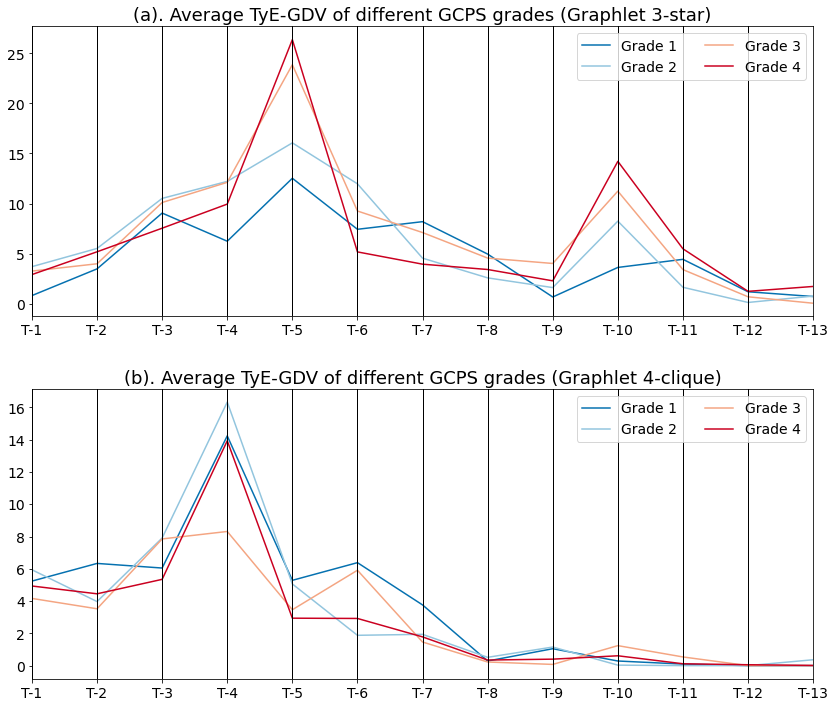

In [12]:
name_list = ['2-clique', '2-path', '3-clique', '3-star', 'tailed-triangle', '4-chordal-cycle', '4-clique']
all_lvl_3star = np.array((tye_gdv_lvl_1[3], tye_gdv_lvl_2[3], tye_gdv_lvl_3[3], tye_gdv_lvl_4[3]))
all_lvl_3clique = np.array((tye_gdv_lvl_1[2], tye_gdv_lvl_2[2], tye_gdv_lvl_3[2], tye_gdv_lvl_4[2]))
all_lvl_4clique = np.array((tye_gdv_lvl_1[6], tye_gdv_lvl_2[6], tye_gdv_lvl_3[6], tye_gdv_lvl_4[6]))
label = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4']
type_label = ['T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'T-6', 'T-7', 'T-8', 'T-9', 'T-10', 'T-11', 'T-12', 'T-13']
df_all_lvl_3star = pd.DataFrame(all_lvl_3star, columns=type_label)
df_all_lvl_3clique = pd.DataFrame(all_lvl_3clique, columns=type_label)
df_all_lvl_4clique = pd.DataFrame(all_lvl_4clique, columns=type_label)
df_all_lvl_3star['Grade'] = label
df_all_lvl_3clique['Grade'] = label
df_all_lvl_4clique['Grade'] = label

onepic, axes = plt.subplots(2,1,figsize=(14,12))
plt.subplots_adjust(hspace=0.25, wspace=.2) 
pd.plotting.parallel_coordinates(df_all_lvl_3star, 'Grade', color=('#0571b0','#92c5de','#f4a582', '#ca0020'), axvlines=True, ax=axes[0])
axes[0].grid(False)
axes[0].legend(fontsize=14, ncol=2)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_title("(a). Average TyE-GDV of different GCPS grades (Graphlet {})".format(name_list[3]), fontsize=18)

pd.plotting.parallel_coordinates(df_all_lvl_4clique, 'Grade', color=('#0571b0','#92c5de','#f4a582', '#ca0020'), axvlines=True, ax=axes[1])
axes[1].grid(False)
axes[1].legend(fontsize=14, ncol=2)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_title("(b). Average TyE-GDV of different GCPS grades (Graphlet {})".format(name_list[6]), fontsize=18)
plt.savefig("PCP_TyEGDV.pdf")

[[5.23809524e+00 6.33333333e+00 6.04761905e+00 1.42380952e+01
  5.28571429e+00 6.38095238e+00 3.76190476e+00 2.85714286e-01
  1.04761905e+00 2.85714286e-01 9.52380952e-02 0.00000000e+00
  0.00000000e+00]
 [5.93939394e+00 3.96969697e+00 7.90909091e+00 1.63333333e+01
  5.06060606e+00 1.87878788e+00 1.93939394e+00 5.15151515e-01
  1.15151515e+00 3.03030303e-02 0.00000000e+00 0.00000000e+00
  3.63636364e-01]
 [4.16417910e+00 3.52238806e+00 7.85074627e+00 8.31343284e+00
  3.46268657e+00 5.91044776e+00 1.46268657e+00 2.23880597e-01
  7.46268657e-02 1.23880597e+00 5.37313433e-01 0.00000000e+00
  0.00000000e+00]
 [4.93406593e+00 4.45054945e+00 5.34615385e+00 1.39340659e+01
  2.93956044e+00 2.92307692e+00 1.78021978e+00 3.46153846e-01
  4.01098901e-01 6.09890110e-01 1.15384615e-01 5.49450549e-02
  1.09890110e-02]]


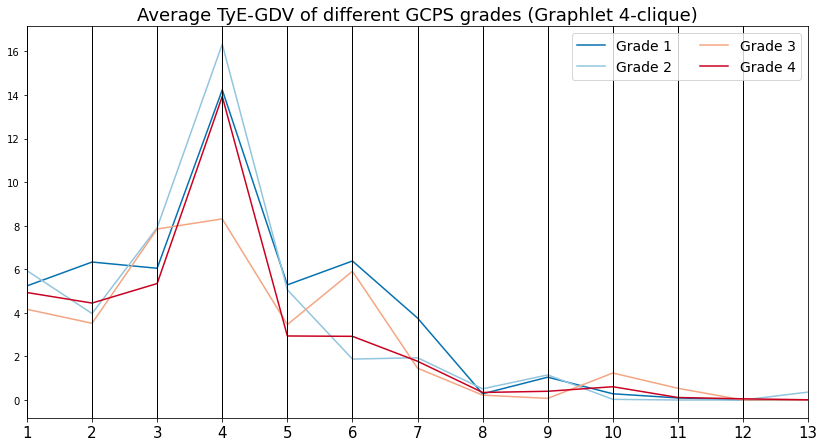

In [21]:
visualise_tyE_GDV(6)

#### Taking Graphlet 7 (4-cycle) for example, patients with lower pain grade have higher value at 
type 5 (friends) <br />
type 9 (collegues) <br />